In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import jieba
# read data
product='pacifier'
data = pd.read_csv('../Problem_C_Data/'+product+'.tsv', sep='\t', header=0)
data = data.drop(columns=['marketplace', 'customer_id',
                          'review_id', 'product_id', 'product_category'])
# 删除未购买且不是vine的记录
data_cleaned=(data.drop(data[data['vine'].isin(['N', 'n']) & data['verified_purchase'].isin(['N', 'n'])].index))
# 时间格式
data_cleaned.review_date = pd.to_datetime(data_cleaned.review_date)
# 合并评论标题及评论内容
data_cleaned['review'] = data_cleaned.review_headline+data_cleaned.review_body
data_cleaned = data_cleaned.drop(columns=['review_headline', 'review_body'])
data_cleaned['product_title'] = data_cleaned['product_title'].str.lower()
data_cleaned['review'] = data_cleaned['review'].str.lower()
# 删除无关产品
dropList = []
for index, row in data_cleaned.iterrows():
    sl = list(jieba.cut(row['product_title'], cut_all=False, HMM=False))
    if 'pacifier' not in sl:
        dropList.append(index)

data_cleaned = data_cleaned.drop(index=dropList)


Text(0.5, 0, 'date')

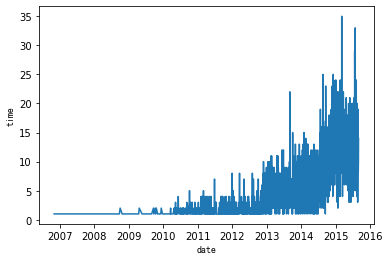

In [95]:
# 观察评论数随时间的变化
data_time = data_cleaned.groupby(
    ["review_date"], sort=True).size().reset_index(name='review_count')
plt.plot(data_time['review_date'], data_time['review_count'])

plt.ylabel(u'time',fontproperties='SimHei')
plt.xlabel(u'date',fontproperties='SimHei')


ehcarts 图

In [102]:
import pyecharts.options as opts
from pyecharts.charts import Line
from pyecharts.faker import Faker
date = data_time['review_date'].tolist()
count = data_time['review_count'].tolist()
c = (
    Line()
    .add_xaxis(date)
    .add_yaxis("number of stars", count)
    .set_global_opts(title_opts=opts.TitleOpts(title="Line-基本示例"))
    .render("line_base.html")
)


In [97]:

d1 = data_cleaned.groupby(["product_parent"], sort=True).size().reset_index(name='total_rates_count')
d2 = data_cleaned.groupby(["product_parent", 'star_rating'],sort=True).size().reset_index(name='stars_rate_count')
merge12 = pd.merge(d1, d2, on='product_parent', how='outer')
merge12['rate_ratio'] = merge12['stars_rate_count'] /merge12['total_rates_count']
merge12


,product_parent,total_rates_count,star_rating,stars_rate_count,rate_ratio
0,4792175,13,5,13,1.000000
1,12142513,1,4,1,1.000000
2,13588167,1,2,1,1.000000
3,21803708,23,2,1,0.043478
4,21803708,23,3,2,0.086957
...,...,...,...,...,...
894,997127233,79,1,2,0.025316
895,997127233,79,2,2,0.025316
896,997127233,79,3,2,0.025316
897,997127233,79,4,7,0.088608


In [105]:
# 自然语言处理
import nltk
nltk.download('punkt')
sentence = """At eight o'clock on Thursday morning
... Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)
tagged[0:6]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\24990\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Error with downloaded zip file


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\24990/nltk_data'
    - 'D:\\python\\nltk_data'
    - 'D:\\python\\share\\nltk_data'
    - 'D:\\python\\lib\\nltk_data'
    - 'C:\\Users\\24990\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
